# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №4. Математическая статистика в анализе данных

Задание выполнил(а): Иринчеева Татьяна 


### Общая информация

__Дата выдачи:__ 22.11.2022

__Дедлайн:__ 04:00 07.12.2022

### Оценивание и штрафы

Каждое задание оценивается в 4 балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{stat}} \times 1/2 ,
$$

где $s_{\text{stat}}$  — количество баллов, которое вы набрали в сумме по всем заданиям.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

В данном домашнем задании вы попрактикуетесь в решении реальных бизнес-задач, связанных с анализом данных и применением методов математической статистики в таких задачах. В данном домашнем задании вам, возможно, понадобится больше чем обычно гуглить и читать различные статьи, получая информацию, при чем не только практического, но и теоретического характера. Это ***нормально*** и как раз поможет разобраться вам в материале, через изучение тех или иных вещей самостоятельно в понятном и комфортном для вас темпе.

Обратите внимание, что фактически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, поскольку большая часть баллов будет выставляться именно за выводы, так как в анализе данных именно они имеют ключевое, итоговое значение и результат. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*. Написанные выводы подтверждайте выполненным кодом программы.

При выполненнии заданий в данном домашнем задании нет никаких ограничений на используемые библиотеки и применяемые вами методы, функционал.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Задание 1


Проанализировать набор данных и ответить на следующие вопросы:

1) Какой % наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [2]:
data = pd.read_csv('test_1_1.csv', delimiter=';')
q_5 = data['metrics'].quantile(.05)
q_95 = data['metrics'].quantile(.95)
per_5 = round(len(data[data['metrics'] < q_5]) / len(data) * 100, 2)
per_95 = round(len(data[data['metrics'] > q_95]) / len(data) * 100, 3)
print(f'{per_5}% наблюдений выходят за 5-процетный перцентиль')
print(f'{per_95}% наблюдений выходят за 95-процетный перцентиль')
len(data)

0.0% наблюдений выходят за 5-процетный перцентиль
4.987% наблюдений выходят за 95-процетный перцентиль


306839

Долго думала над тем, что значит фраза "выходят за рамки n-процентного перцентиля". Буду считать, что наблюдения, которые выходят за 5-процентный перцентиль - это значения, меньшие 5-процентного перцентиля (q_5), а наблюдения, которые выходят за 95-процентный перцентиль - это значения, большие 95-процентного перцентиля (q_95). К этому выводу пришла, не опираясь на определение квантиля или перцентиля, а исходя из здравого смысла. Мне кажется смысл этого вопроса заключается в том, чтобы понять, как много у нас очень маленьких или очень больших значений, и разумно ли вообще использовать понятие перцентиля для анализа нашего датасета, или же в каком-то случае это будет бессмысленным. 

5-й перцентиль нашей генеральной совокупности (переменная q_5) равен 1.0. Это означает, что 5% наблюдений - это значения, которые меньше или равны 1. В задании требуется найти, какой % наблюдений выходит за 5-процентный перцентиль, поэтому у меня в условии строгое неравенство. Однако, получилось, что 0% процентов наблюдений выходят за 5-процентный перцентиль, значит, 1 - минимальное значение в нашей генеральной совокупности, и таких значений (равных единице) довольно много, а именно 43% (полученное значение, если неравенство поменять на нестрогое). C 95-процентным перцентилем дело обстоит довольно стандартно, как и ожидается, когда речь идет о квантилях. 95-й перцентиль нашей генеральной совокупности (переменная q_95) равен 57. Это означает, что 95% наблюдений - это значения, которые меньше или равны 57. Получаем, что 4.987% наблюдений выходят за 95-процентный перцентиль. Это значит, что значений, равных 57, не так много в нашей выборке (около 0.15%) по сравнению с количеством единиц, поэтому в этом случае термин "перцентиль" не теряет своего смысла. 

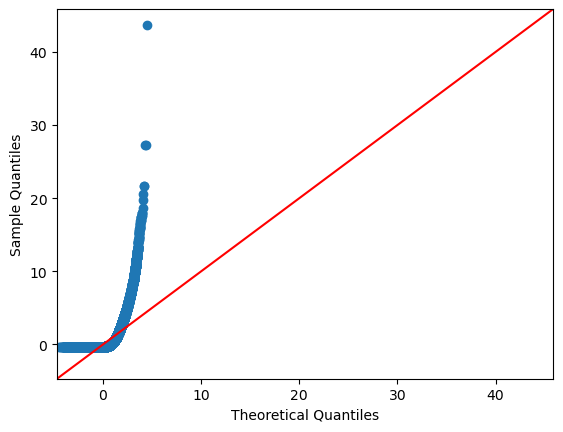

In [3]:
from statsmodels.api import qqplot
vec = np.array(data['metrics'])
fig = qqplot(vec, line='45', fit=True)

Посмотрев на график QQ-plot, можно сразу понять, что наше распределение точно не является нормальным, поэтому нам необходимы другие тесты. При поиске методов для определения вида распределения нашла следующую статью: https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9 и решила определить распределение при помощи библиотеки Fitter, предварительно построив гистограмму, чтобы сделать некоторые предположения о нашем распределении. Так как библиотека Fitter работает с распределениями из библиотеки SciPy, то я посмотрела в документации, как выглядят неизвестные мне распределения и сравнила их с гистограммой. 


In [4]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

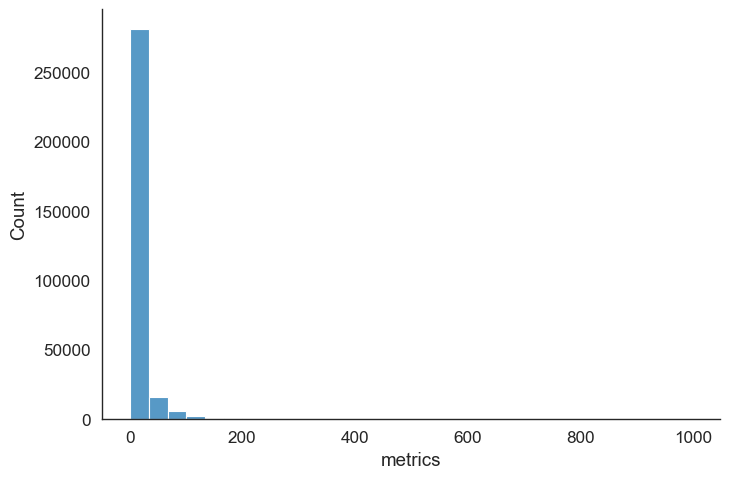

In [5]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.4)
sns.displot(data=data['metrics'], kind="hist", bins=30, aspect = 1.5)

Конечно, по гистограмме можно сразу сказать, что данные подчиняются экспоненциальному закону распределения, но лучше проверить и с другими возможными распределениями. В списке возможных распределений я выделила: бета-распределение, распределения Гумбеля (двойное экспоненциальное распределение), экспоненциальное распределение, экспоненциально нормальное распределение, распределение Парето. 

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.75s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponnorm,0.000508,11396.122892,-6.204231e+06,inf,0.451909,0.0
pareto,0.000512,11349.277965,-6.201595e+06,inf,0.453469,0.0
expon,0.000512,11347.281405,-6.201608e+06,inf,0.453469,0.0
gumbel_r,0.001498,12966.589393,-5.872217e+06,inf,0.297254,0.0
beta,0.004155,33807.874604,-5.559130e+06,inf,0.430255,0.0


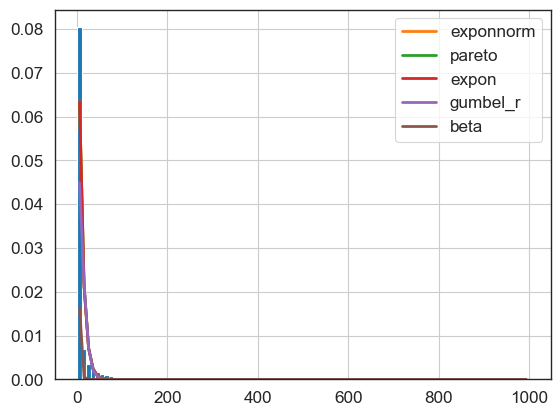

In [6]:
metrics = data['metrics'].values
f = Fitter(metrics,
           distributions=['beta',
                          'gumbel_r',
                          "expon",
                          "exponnorm",
                          "pareto"])
f.fit()
f.summary()

Тест проверил 5 заданных распределений, и для каждого распределения значение p-value равно 0. Это не означает, что тест работает некорректно. Скорее всего это связано с тем, что нам дано дискретное распределение, а мы сравниваем его с непрерывными. Я решила, что у нас достаточно много наблюдений, а именно 306839, чтобы мы могли аппроксимировать дискретное распределение непрерывным так же, как, например, мы аппроксимируем биномиальное распределение нормальным. Однако теперь мы не можем руководствоваться значением p-value, но мы можем посмотреть на столбец "sumsquare error". "sumsquare error" - это числовая характеристика, которая показывает, насколько две величины отличаются друг от друга. Она очень похожа на дисперсию, так как считается, как сумма квадратов разности двух точек из двух рассматриваемых распределений. То есть чем меньше это значение, тем более похожи распределения между собой. Эта характеристика почти одинакова для трех распределений из пяти: распределения Парето, эксопоненциально нормального и экспоненциального распределений. Это неудивительно, ведь все три распределения являются степенными, но у экспоненциально нормального распределения это значение все же меньше, поэтому ответ на данный вопрос: данные распределены по экспоненциально нормальному закону.



### Задание 2



Определить, можно сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

Проверим дисперсии на гомогенность.

In [7]:
data2 = pd.read_csv('test_1_2.csv', delimiter=';')
from scipy.stats import levene
X_1 = data2[data2['variant'] == 'A']['metrics']
Y_1 = data2[data2['variant'] == 'B']['metrics']
levene(X_1, Y_1)

LeveneResult(statistic=4.313416821004634, pvalue=0.03781432358426188)

Согласно документации, в критерии Левена, нулевой гипотезой является гипотеза о том, что данные выборки удовлетворяют свойству гомогенности дисперсий.

**pvalue** этой гипотезы у нас получилось равно 0.038, что соотвествует 3.8%. Это значение меньше уровня значимости, установленного нами в 5%, значит у нас есть основания отвергнуть нулевую гипотезу и считать, что выборка имеет негомогенные дисперсии.

Проверим распределения на нормальность с помощью графика Q-Q plot.

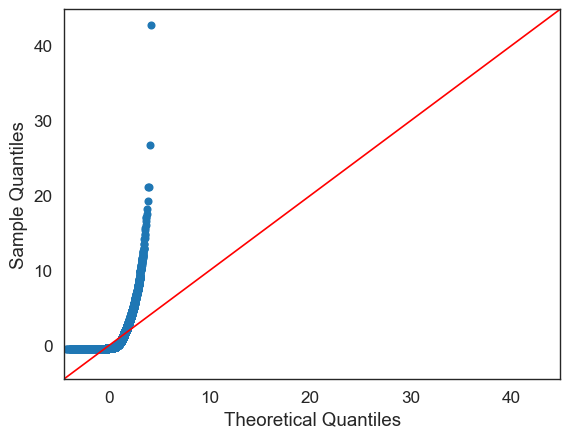

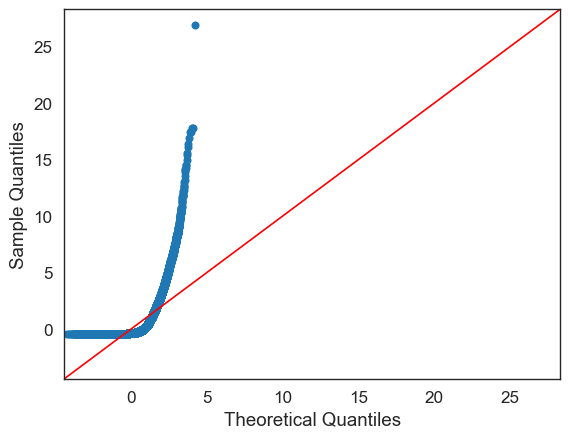

In [8]:
fig1 = qqplot(X_1, line='45', fit=True)
fig2 = qqplot(Y_1, line='45', fit=True)

Получаем, что наши данные не отвечают требованиям для применения t-критерия Стьюдента, так как
1. Дисперсии негомогенны 
2. Оба распределения (для группы А и для группы B) не являются нормальными

Значит, будем использовать Z-test, так как он подходит для разных распределений и хорошо работает на больших выборках. 
Для этого сформулируем нулевую и альтернативную гипотезы:

1. **Нулевая гипотеза $H_0$**: распределение значений случайной величины "metrics" **совпадает** для групп А и B.
2. **Альтернативная гипотеза $H_1$**: распределение значений случайной величины "metrics" **не совпадает** для двух представленных групп.

In [9]:
from statsmodels. stats.weightstats import ztest as ztest

X_1 = data2[data2['variant'] == 'A']['metrics']
Y_1 = data2[data2['variant'] == 'B']['metrics']

ztest(X_1, Y_1, value = 0) 

(-2.179573994371754, 0.029289054235422454)

**pvalue** этой гипотезы у нас получилось равно 0.029, что соотвествует 2.9%. Это значение больше уровня доверия, установленного нами в 2.5%, значит у нас нет оснований отвергнуть нулевую гипотезу и считать, что распределение значений различается для двух групп.

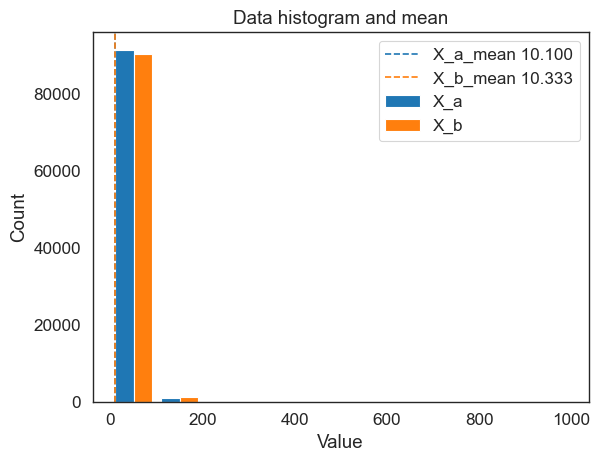

In [10]:
plt.hist([X_1, Y_1])
X_mean_a = np.mean(X_1)
X_mean_b = np.mean(Y_1)
plt.axvline(x=X_mean_a, color='C0', linestyle='--')
plt.axvline(x=X_mean_b, color='C1', linestyle='--')
plt.ylabel('Count')
plt.xlabel('Value')
plt.title('Data histogram and mean')
plt.legend(['X_a_mean %.3f' % X_mean_a,
            'X_b_mean %.3f' % X_mean_b,
            'X_a', 'X_b']);

График подтверждает сделанные выводы. Можно увидеть, что средние значение очень близки друг к другу, и в целом данные ведут себя почти одинаково.

### Задание 3



Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и работу с несбалансированными выборками

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

Для начала посмотрим на средние значения и дисперсии двух выборок


In [11]:
data3 = pd.read_csv('hw2_test_1_3.csv', delimiter=';')
A = data3[data3['variant'] == 'A']
D = data3[data3['variant'] == 'D']
A_mean = A['metrics'].mean()
D_mean = D['metrics'].mean()
A_std = A['metrics'].std()
D_std = D['metrics'].std()
print(f'Среднее значение для выборки А: {A_mean} \nСреднее значение для выборки D: {D_mean} \nСреднее отклонение для выборки А: {A_std} \nСреднее отклонение для выборки D: {D_std}')

Среднее значение для выборки А: 10.099561961892842 
Среднее значение для выборки D: 9.942386297281516 
Среднее отклонение для выборки А: 23.130148232686025 
Среднее отклонение для выборки D: 21.802746940214917


Проверим данные на гомогенность дисперсий и на нормальность.

In [12]:
levene(A['metrics'], D['metrics'])

LeveneResult(statistic=0.6909401153215109, pvalue=0.40584663266049437)

Согласно документации, в критерии Левена, нулевой гипотезой является гипотеза о том, что данные выборки удовлетворяют свойству гомогенности дисперсий.

**pvalue** этой гипотезы у нас получилось равно 0.406, что соотвествует 40.6%. Это значение больше уровня значимости, установленного нами в 5%, значит у нас нет оснований отвергнуть нулевую гипотезу и считать, что выборка имеет негомогенные дисперсии.

Проверим данные на нормальность с помощью построения графиков Q-Q plot.


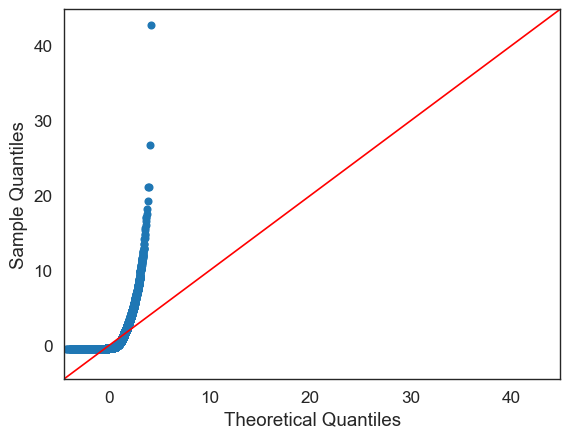

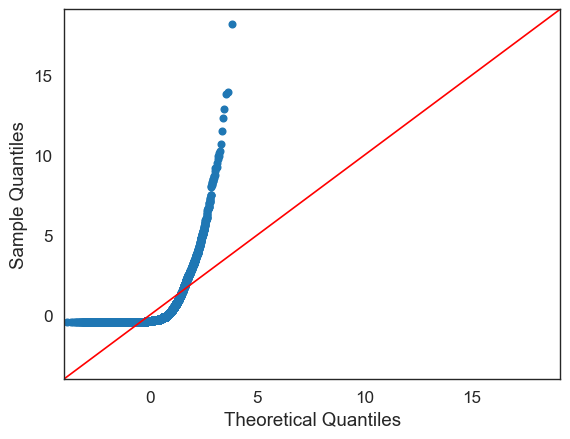

In [13]:
fig_A = qqplot(A['metrics'], line='45', fit=True)
fig_D = qqplot(D['metrics'], line='45', fit=True)

Мы видим, что обе выборки A и D не распределены нормально. Более того, ранее мы выяснили, что дисперсии обеих групп негомогенны, поэтому мы уже не можем использовать t-test для сравнения двух выборок.

Также у нас имеется проблема несбалансированных данных. Убедимся в этом, посмотрев непосредственно на размеры выборок и визуализируем эту разницу для большей наглядности.



In [14]:
print(f'Размер выборки А: {len(A)} \nРазмер выборки D: {len(D)}')

Размер выборки А: 92686 
Размер выборки D: 15413


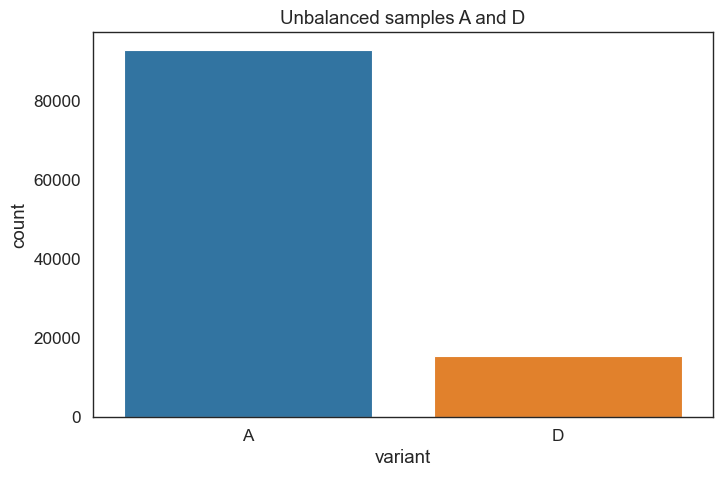

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data = data3, x = 'variant')
plt.title('Unbalanced samples A and D')
plt.show()

Один из простейших методов борьбы с несбалансированными данными - это undersampling, то есть рандомное удаление значений из большей выброки для получения сэмплов одинакового размера. Более эффективным и точным методом является oversampling, при котором мы генерируем синтетические данные для заполнения меньшей выборки, используя методы машинного обучения, например случайный лес или метод k ближайших соседей. У нас некритичная разница в размерах, поэтому можем применить первый метод. (тем более машинного обучения я не знаю)

Источник:
https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

In [16]:
normalized_df = pd.concat([D, A.sample(n=15413, random_state=42)])

Посмотрим на сбалансированные выборки на графике.


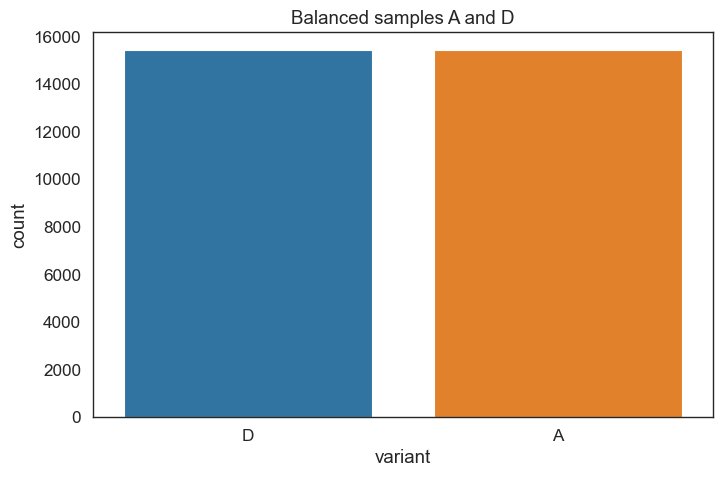

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data = normalized_df, x = 'variant')
plt.title('Balanced samples A and D')
plt.show()

Применим Z-test к нашим уже сбалансированным выборками A и D. Для этого определим нулевую и альтернативную гипотезы.

1. **Нулевая гипотеза $H_0$**: распределение значений случайной величины "metrics" **совпадает** для групп А и D.
2. **Альтернативная гипотеза $H_1$**: распределение значений случайной величины "metrics" **не совпадает** для двух представленных групп.

In [18]:
ztest(A['metrics'].sample(n=15413, random_state=42), D['metrics']) 

(1.3140273902634274, 0.18883698694681084)

**p-value** равен 0.189, что соответствует 18.9%. Это значение больше уровня значимости, установленного нами в 5%, значит у нас нет оснований отвергнуть нулевую гипотезу и считать, что выборки A и D распределены неодинаково.

Визуализируем распределение данных двух групп А и D для подтверждения наших выводов и для большей наглядности.

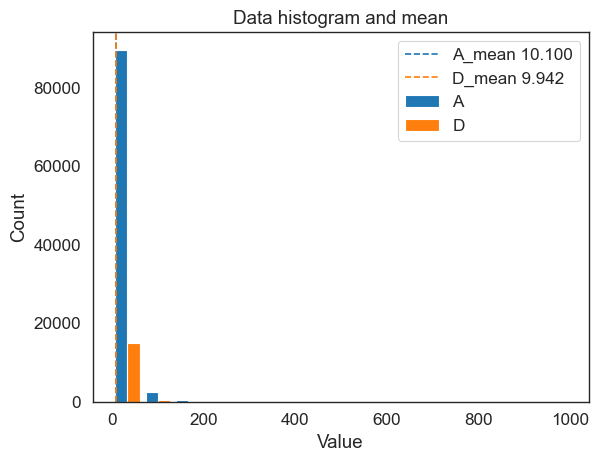

In [19]:
plt.hist([A['metrics'], D['metrics']], bins=15)
plt.axvline(x=A_mean, color='C0', linestyle='--')
plt.axvline(x=D_mean, color='C1', linestyle='--')
plt.ylabel('Count')
plt.xlabel('Value')
plt.title('Data histogram and mean')
plt.legend(['A_mean %.3f' % A_mean,
            'D_mean %.3f' % D_mean,
            'A', 'D']);

Так как нашей задачей было провести А/Б тест, то можно сделать следующий вывод: так как данные в двух группах А и D почти не различаются, то введенное изменение не было эффективным, и его не стоит внедрять в будущем.

### Задание 4



Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и снижение дисперсии в них

Описание данных: 

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

In [37]:
data4 = pd.read_csv('test_1_1.csv', delimiter=';')
cv = data4['metrics'].std() / data4['metrics'].mean()
cv

2.2301166718750856

Чтобы определить, насколько велика дисперсия выборки, мы можем сравнить ее со средним значением, а именно рассмотреть коэффициент вариации (относительное страндартное отклонение). Он вычисляется как отношение стандартного отклонения к среднему и показывает, как сильно разбросаны данные относительно среднего. Обычно считают, что дисперсия нормальная, если относительное стандартное отклонение не больше 1. Если же коэффициент вариации больше 1, такая дисперсия считается большой, и с ней нужно что-то делать. В нашем случае cv равен 2.23, это число больше 1 более, чем в два раза, а значит мы будем чистить дисперсию. 

Источники: 
1. https://statisticsbyjim.com/basics/coefficient-variation/
2. https://www.statology.org/what-is-a-good-coefficient-of-variation/

Один из методов, позволяющий бороться с большой дисперсией - это работы с выбросами. Выбросы - это нестандартные для выборки значения, которые, возможно, получены в результате эксперементальной ошибки или же являются аномальным явлением, никак не характеризующим весь датасет. Найдем такие значения и избавимся от них. Для этого построим специальный график 'boxplot'.

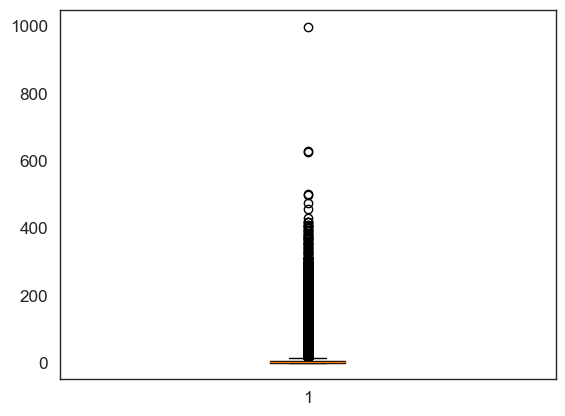

<Figure size 1000x700 with 0 Axes>

In [38]:
plt.boxplot(data4['metrics'])
fig = plt.figure(figsize =(10, 7))
plt.show()

На картинке мы видим, что чуть выше основного скопления данных присутствуют одиночные значения в виде небольших кругов. Это и есть наши выбросы, с которымми мы будем бороться. Далее руководствуемся методом IQR, который говорит нам, что выбросы - это значения, которые находятся правее на числовой оси, чем некоторое значение upper_bound (верхняя граница) и значения, которые находятся левее на числовой оси, чем некоторое значение lower_bound (нижняя граница). Границы мы вычисляем с помощью квартилей и значения iqr region, которое показывает нам, как данные распределены относительно медианы. Проведем необходимые вычисления.

In [39]:
# finding the 1st quartile
q1 = np.quantile(data4['metrics'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(data4['metrics'], 0.75)
med = np.median(data4['metrics'])
 
# finding the iqr region
iqr = q3 - q1
 
# finding upper and lower whiskers
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)
iqr, upper_bound, lower_bound

(6.0, 16.0, -8.0)

Посмотрим на наши выбросы.

In [40]:
outliers = data4['metrics'][(data4['metrics'] <= lower_bound) | (data4['metrics'] >= upper_bound)]
print('Выбросы в нашем датасете:{}'.format(outliers))

Выбросы в нашем датасете:5          37
13         61
51         18
56         18
57         25
         ... 
306810     32
306812    114
306824     62
306831     37
306837     81
Name: metrics, Length: 48205, dtype: int64


Избавимся от выбросов, удалив соответствующие строки.

In [24]:
data4 = data4['metrics'].drop(data4[(data4['metrics'] <= lower_bound) | (data4['metrics'] >= upper_bound)].index)
data4

0          1
1          1
2          4
3          1
4          1
          ..
306833    12
306834     8
306835    11
306836     1
306838     1
Name: metrics, Length: 258634, dtype: int64

Мы избавились от выбросов и предполагаем, что дисперсия должна уменьшится. Посчитаем еще раз коэффициент вариации.

In [25]:
data4.std() / data4.mean()

1.0592903756195418

Коэффициент вариации получился больше единицы, но совсем не намного. Будем считать, что разница в 0.06 для нас незначительна.

Источник:
https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

### Задание 5



Есть эксперимент с поисковыми подсказками. Вы хотите узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- id - уникальный идентификатор пользователя
- action -
- view - кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

Сначала считаем данные:

In [26]:
data5 = pd.read_csv('task5.csv', delimiter=',')

1. Сформируем метрику для оценки эксперимента:
    так как мы хотим узнать, как изменился CTR, то нашей метрикой и будет CTR. CTR = кол-во кликов / кол-во показов * 100%. В нашем случае кол-во кликов - это величина action, а кол-во показов - это величина view. Преобразуем наши данные.


In [27]:
data5['CTR'] = data5['action'] / data5['view'] * 100

2. Перейдем к подбору критерий. Для этого рассмотрим конкретнее наше распределение. 

In [28]:
group_A = data5[data5['variant'] == 'A']
group_B = data5[data5['variant'] == 'B']
len(group_A), len(group_B)

(4646, 3545)

Длины примерно одинаковые, поэтому наши выборки сбалансированные. 

In [29]:
group_A['CTR'].std() / group_A['CTR'].mean(), group_B['CTR'].std() / group_A['CTR'].mean()

(0.3923251694965416, 0.39462811532845465)

Коэффициент вариации у обеих групп меньше 1. Это значит, что в обеих группах дисперсия не является слишком большой, и мы можем не чистить ее дополнительно. Более того, дисперсии примерно одинаковы для обеих групп, это можно дополнительно проверить с помощью теста Левена.

In [30]:
levene(group_A['CTR'], group_B['CTR'])

LeveneResult(statistic=0.579721643419267, pvalue=0.44644337372072784)

Как и ожидалось, дисперсии гомогенны, так как полученное значение p-value равно 0.446


Проверим распределения на нормальность, построив графики QQ-plot.

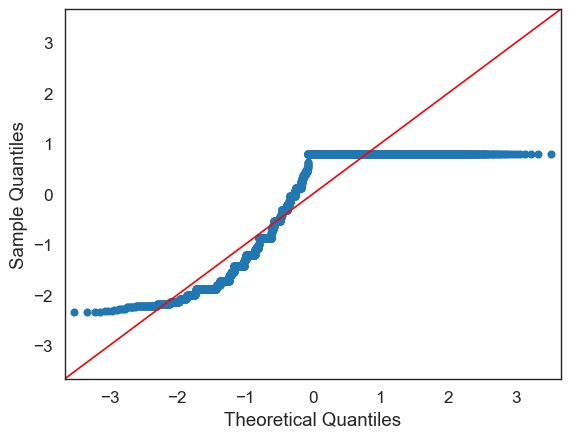

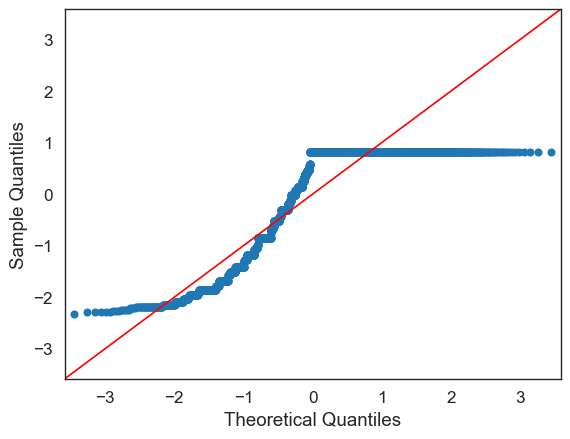

In [31]:
fig_A = qqplot(group_A['CTR'], line='45', fit=True)
fig_D = qqplot(group_B['CTR'], line='45', fit=True)

Так как дисперсии негомогенны, и распределения не являются нормальными, то мы не можем применять, например t-test. Мы могли бы применить Z-test, но размеры выборок недостаточно большие, поэтому, возможно, в этом случае тест будет работать не совсем корректно. Попробуем применить непараметрический тест Колмогорова-Смирнова для двух выборок. Он не зависит от выборок, нет ограничений на размеры сэмплов, поэтому он должен работать корректно. Для этого определим нулевую и альтернативную гипотезы:
1. **Нулевая гипотеза $H_0$**: распределение значений случайной величины "CTR" **совпадает** для групп A и B.
2. **Альтернативная гипотеза $H_1$**: распределение значений случайной величины "CTR" **не совпадает** для двух рассматриваемых выборок.

In [32]:
from scipy.stats import kstest
kstest(group_A['CTR'], group_B['CTR'])

KstestResult(statistic=0.01283722534269739, pvalue=0.8891046375919578)

**pvalue** этой гипотезы у нас получилось равно 0.889, что соотвествует 88.9%. Это значение больше уровня значимости, установленного нами в 5%, значит у нас нет оснований отвергнуть нулевую гипотезу и считать, что выборки неодинаковы. Значит, выборки не имеют значительных различий. Можем убедиться в сделанном выводе на гистограмме.  

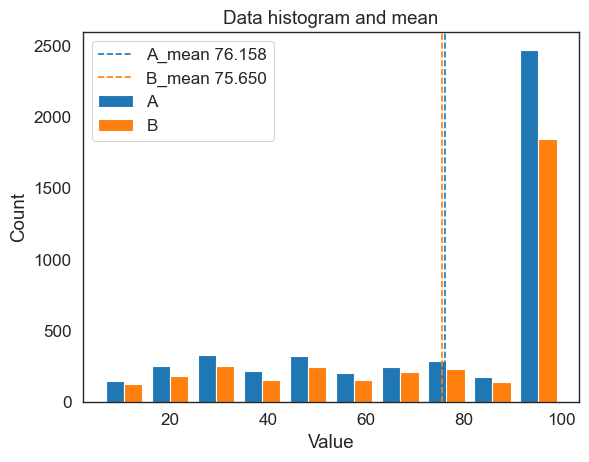

In [33]:
plt.hist([group_A['CTR'], group_B["CTR"]])
plt.axvline(x=group_A['CTR'].mean(), color='C0', linestyle='--')
plt.axvline(x=group_B['CTR'].mean(), color='C1', linestyle='--')
plt.ylabel('Count')
plt.xlabel('Value')
plt.title('Data histogram and mean')
plt.legend(['A_mean %.3f' % group_A['CTR'].mean(),
            'B_mean %.3f' % group_B['CTR'].mean(),
            'A', 'B']);

3. Итак, мы убедились в том, что выборки A и B не имеют значительных различий, поэтому не стоит вводить изменения, так как они не приведут, например, к увеличению клиентской базы или прибыли.